In [1]:
import numpy as np
import json
from PIL import Image
import matplotlib.pyplot as plt

In [2]:
import torch
import torchvision
from torchvision import models, transforms

In [3]:
torch.__version__

'1.4.0'

In [4]:
torchvision.__version__

'0.5.0'

In [5]:
Net = models.vgg16(pretrained=True)

In [6]:
print(Net)

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [7]:
class BaseTransform:
    def __init__(self, resize, mean, std):
        self.base_transform = transforms.Compose(
            [
                transforms.Resize(resize),
                transforms.CenterCrop(resize),
                transforms.ToTensor(),
                transforms.Normalize(mean, std),
            ]
        )

    def __call__(self, img):
        return self.base_transform(img)

In [8]:
class ILSVRCPredictor:
    def __init__(self, class_index):
        self.class_index = class_index
    
    def predict_max(self, out):
        max_id = np.argmax(out.detach().numpy())
        predict_label_name = self.class_index[str(max_id)][1]
        return predict_label_name
    


In [9]:
ILSVRC_class_index = json.load(open('./pytorch_advanced/1_image_classification/data/imagenet_class_index.json', 'r'))

In [10]:
predictor = ILSVRCPredictor(ILSVRC_class_index)

In [11]:
image_path = 'pytorch_advanced/1_image_classification/data/goldenretriever-3724972_640.jpg'
img = Image.open(image_path)

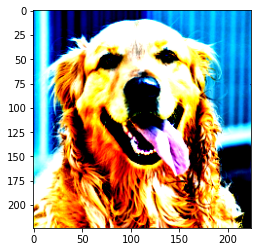

In [12]:
resize = 224
mean = (0.485, 0.456, 0.406)
std = (0.229, 0.224, 0.225)
transformer = BaseTransform(resize, mean, std)
img_transformed = transformer(img)
plt.imshow(np.clip(img_transformed.numpy().transpose((1, 2, 0)), 0, 1))

In [13]:
inputs = img_transformed.unsqueeze_(0)    # ミニバッチ形式

In [14]:
out = Net(inputs)

In [15]:
result = predictor.predict_max(out)

In [16]:
"This is " + result

'This is golden_retriever'